# Learning and Decision Making

## Laboratory 1: Markov chains

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the train modeling problem described in the Homework and for which you wrote a Markov chain model:

<img src="trains.png" width="400px">

Recall that your chain should describe the motion of the single train traveling the network, where: 

* Stations $A$ and $B$ are just like regular stops;
* The travel time between any two consecutive stops is exactly 10 minutes. The train stops exactly 2 minutes in each location.
* At the intersection marked with a bold $\times$, the train follows the branch 1-3 with probability 0.5, the branch 4 with probability 0.15, and the branch 5-6 with probability 0.35.

---

#### Activity 1.        

Implement your Markov chain model in Python. In particular,

* Create a list with all the states;
* Define a `numpy` array with the corresponding transition probabilities.

The order for the states used in the transition probability matrix should match that in the list of states. 

**Note 1**: Don't forget to import `numpy`. If you need additional matrix operations (such as matrix powers or eigenvalues and eigenvectors), you may also import the library `numpy.linalg`.

**Note 2**: Make sure to print the result in the end.

---

In [68]:
import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt


states = ['StationA', 'Stop1', 'Stop2', 'Stop3', 'Stop4', 'Stop5', 'Stop6', 'StationB']
trans_prob = np.array([[0, 0.5,0,0, 0.15, 0.35, 0,0],[0,0,1,0,0,0,0, 0],[0,0,0,1,0,0,0, 0],[0,0,0,0,0,0,0, 1],[0,0,0,0,0,0,0, 1],[0,0,0,0,0,0,1, 0],[0,0,0,0,0,0,0, 1],[1,0,0,0,0,0,0, 0]])

print("States:")
print(states)
print()
print("Transition Matrix: ")
print(trans_prob)

States:
['StationA', 'Stop1', 'Stop2', 'Stop3', 'Stop4', 'Stop5', 'Stop6', 'StationB']

Transition Matrix: 
[[0.   0.5  0.   0.   0.15 0.35 0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.  ]]


---

#### Activity 2.

Compute, using the proper transition matrix manipulations, the probability of the following trajectories:

* 4 - $B$ - $A$ - 4
* $A$ - 2 - 3 - $B$ - $A$
* 5 - 6 - $B$ - $A$ - 4

**Note:** Make sure to print the result in the end.

---

In [69]:

stationA = states.index('StationA')
stationB = states.index('StationB')
stop1 = states.index('Stop1')
stop2 = states.index('Stop2')
stop3 = states.index('Stop3')
stop4 = states.index('Stop4')
stop5 = states.index('Stop5')
stop6 = states.index('Stop6')


print("4-B-A-4")
tProb1 = trans_prob[stop4][stationB] * trans_prob[stationB][stationA] * trans_prob[stationA][stop4]
print(tProb1)

print("A-2-3-B-A")
tProb2 = trans_prob[stationA][stop2] * trans_prob[stop2][stop3] * trans_prob[stop3][stationB] * trans_prob[stationB][stationA]
print(tProb2)

print("5-6-B-A-4")
tProb3 = trans_prob[stop5][stop6] * trans_prob[stop6][stationB] * trans_prob[stationB][stationA] * trans_prob[stationA][stop4]
print(tProb3)

4-B-A-4
0.15
A-2-3-B-A
0.0
5-6-B-A-4
0.15


### 2. Stability

---

#### Activity 3

Compute the stationary distribution for the chain. Confirm, computationally, that it is indeed the stationary distribution.

**Note:** The stationary distribution is a *left* eigenvector of the transition probability matrix associated to the eigenvalue 1. As such, you may find useful the numpy function `numpy.linalg.eig`. Also, recall that the stationary distribution is *a distribution*.

---

In [70]:

statDistributionNotNormalized = np.real(np.linalg.eig(np.transpose(trans_prob))[1][:,0]) 
#np.real: The complex values we do not take into account
#np.transpose: We want the left eigenvector, not the right eigenvector

# Normalize
statDistribution = statDistributionNotNormalized/(np.sum(statDistributionNotNormalized))


print("The Stationary Distribution: ")
print(statDistribution)
print()

#Check if it is indeed a Stationary Distribution
isStationary = True;
if(np.sum(statDistribution)) != 1.0:
    isStationary = False;
for x in range(trans_prob.shape[0]):
    mu = statDistribution[x]
    total = 0
    for y in range(trans_prob.shape[1]):
        total += statDistribution[y]*trans_prob[y][x]
    if(np.absolute(total - mu) > 0.0001): #Small error is possible, due to no exact operations
        isStationary = False;

print("Is this indeed a Stationary Distribution?:", isStationary)

The Stationary Distribution: 
[0.22988506 0.11494253 0.11494253 0.11494253 0.03448276 0.08045977
 0.08045977 0.22988506]

Is this indeed a Stationary Distribution?: True


---

#### Activity 4.

Empirically show that the chain is ergodic.

**Note:** Recall that a chain is ergodic if, given any initial distribution, it converges to the stationary distribution.

---

In [71]:

initialDistribution = np.array([0, 0.5, 0, 0, 0.15, 0.35, 0, 0])
ergodicCheck = np.array(np.dot(initialDistribution,(np.linalg.matrix_power(trans_prob,100000))))
#use np.dot for matrix product, not '*'
#use np.linalg.matrix_power for matrix power, not '**'

print("Array by ergodic Check:")
print(ergodicCheck) 

print("Stationary Distribution")
print(statDistribution)

isEqual = True;
for i in range(ergodicCheck.shape[0]):
    if(np.absolute(ergodicCheck[i] - statDistribution[i]) > 0.0001):
        isEqual = False;
    
print("Is the chain ergodic:", isEqual)

Array by ergodic Check:
[0.22988506 0.11494253 0.11494253 0.11494253 0.03448276 0.08045977
 0.08045977 0.22988506]
Stationary Distribution
[0.22988506 0.11494253 0.11494253 0.11494253 0.03448276 0.08045977
 0.08045977 0.22988506]
Is the chain ergodic: True


### 3. Simulation

You are now going to *simulate* the Markov chain that you defined in Question #1.

---

#### Activity 5

Generate a 10,000-step long trajectory of the chain defined in Activity #1. 

---

In [72]:
currentState = "StationA"
frequencies = {} #Dictionary
#Set all the frequencies to zero
for s in states:
    frequencies[s] = 0

#Calculate a 10,000-step long trajectory of the chain and keep track of the frequency of each state
for i in range(10000):
    frequencies[currentState]+=1
    prob_array = trans_prob[states.index(currentState)]
    currentState = np.random.choice(states, p=prob_array)

print(frequencies)

{'StationA': 2301, 'Stop1': 1150, 'Stop2': 1150, 'Stop3': 1150, 'Stop4': 351, 'Stop5': 799, 'Stop6': 799, 'StationB': 2300}


---

#### Activity 6

Draw a histogram of the trajectory generated in Activity #5. Make sure that the histogram has one bin for each state. Compare the relative frequencies with the result of Activity #3.

**Note**: Don't forget to load `matplotlib`.

---

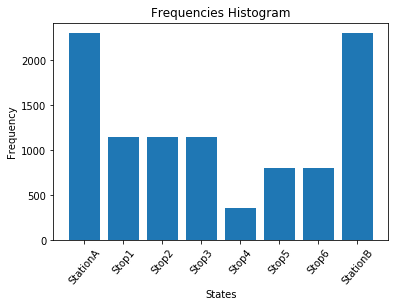

In [73]:

plt.bar(range(len(frequencies)), list(frequencies.values()), align='center')
plt.xticks(range(len(frequencies)), list(frequencies.keys()), rotation=50)

plt.xlabel('States');
plt.ylabel('Frequency');

plt.title('Frequencies Histogram');

plt.show()